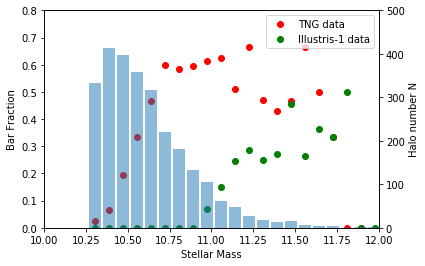

In [8]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('F:\Linux')
import illustris_python as il

#TNG data
barID = np.load('f:/Linux/localRUN/barredID_TNG.npy')
diskID = np.load('f:/Linux/localRUN/diskID_TNG.npy')
StellarMass = il.func.loadSubhalos('TNG', 99, 'SubhaloMassType')[:,4] / 0.704
diskmass = np.log10(StellarMass[diskID]*10**10)
barmass = np.log10(StellarMass[barID]*10**10)


#Illustris-1 data
il1_barID = np.load('f:/Linux/localRUN/barredID_il1.npy')
il1_diskID = np.load('f:/Linux/localRUN/diskID_il1.npy')
il1_StellarMass = il.func.loadSubhalos('il1', 135, 'SubhaloMassType')[:,4] / 0.6774
il1_diskmass = np.log10(il1_StellarMass[il1_diskID]*10**10)
il1_barmass = np.log10(il1_StellarMass[il1_barID]*10**10)


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Stellar Mass')
ax1.set_ylabel('Bar Fraction')
ax2 = ax1.twinx()
ax2.set_ylabel('Halo number N')

#plot histogram
n,bins,others = ax2.hist(diskmass, 22, rwidth=0.9, alpha = 0.5)
ax2.set_xlim(10.0,12)
ax1.set_ylim(0.0, 0.8)
ax2.set_ylim(0, 500)
Fraction = []
il1_Fraction = []
x_point = []

for i in range(len(bins)-1):
    low = bins[i]
    high = bins[i+1]


    disknum = len(diskmass[(diskmass >= low) & (diskmass < high)])
    barred = len(barmass[(barmass >= low) & (barmass < high)])

    il1_disknum = len(il1_diskmass[(il1_diskmass >= low) & (il1_diskmass < high)])
    il1_barred = len(il1_barmass[(il1_barmass >= low) & (il1_barmass < high)])

    if disknum == 0:
        Fraction.append(0)
    else:
        Fraction.append(barred / disknum)

    if il1_disknum == 0:
        il1_Fraction.append(0)
    else:
        il1_Fraction.append(il1_barred / il1_disknum)


        
ax1.plot(bins[:-1] + (bins[1] - bins[0]) / 2, Fraction, 'o', c = 'r', label = 'TNG data')
ax1.plot(bins[:-1] + (bins[1] - bins[0]) / 2, il1_Fraction, 'o', c = 'g', label = 'Illustris-1 data')
ax1.legend(loc=1)

In [3]:
bins[1]-bins[0]

0.08351930560861831